# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [ ]:
!git clone https://github.com/quentgar/semi-supervised-classif.git
!mv semi-supervised-classif/data/* ./mydata/

Cloning into 'semi-supervised-classif'...
remote: Enumerating objects: 50166, done.
remote: Counting objects: 100% (50166/50166), done.
remote: Compressing objects: 100% (49600/49600), done.
remote: Total 50166 (delta 879), reused 49840 (delta 556), pack-reused 0
Receiving objects: 100% (50166/50166), 125.95 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (879/879), done.
Checking out files: 100% (49941/49941), done.


In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 10755, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 10755 (delta 0), reused 3 (delta 0), pack-reused 10752
Receiving objects: 100% (10755/10755), 10.83 MiB | 11.37 MiB/s, done.
Resolving deltas: 100% (7434/7434), done.
/content/yolov5
     |████████████████████████████████| 596 kB 8.3 MB/s 
     |████████████████████████████████| 1.1 MB 10.1 MB/s 
     |████████████████████████████████| 145 kB 31.6 MB/s 
     |████████████████████████████████| 178 kB 37.2 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 138 kB 32.7 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2

# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-annotate.gif)

# Version

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-preprocessing.png)

# Export

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-export.png)

# Download Code 

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-snippet.png)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
#after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="6sLl967tKCzTVjD4dQMe")

# Jeu de données d'entraînement, faire varier la version entre 1 et 3 pour
# sans ou avec augmentations de données
project = rd.workspace().project('animals-train')

# Jeu de données avec pseudo-labels ajoutées, faire varier la version entre 2 et 3 
# pour 200 ou 400 pseudos-labels

# project = rf.workspace().project("pseudo-labeled-augmentation")

dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Pseudo-labeled-augmentation-3 in yolov5pytorch:: 100%|██████████| 5789/5789 [00:02<00:00, 2798.02it/s]


In [ ]:
dataset.location

'/content/datasets/Animals-train-2'

# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 64 --batch 32 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Pseudo-labeled-augmentation-3/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=32, imgsz=64, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-218-g7539cd7 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# Jeu de test fourni 100 images

rf = Roboflow(api_key="6sLl967tKCzTVjD4dQMe")
project = rf.workspace().project("animals-test-dataset")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Animals-test-dataset-1 in yolov5pytorch:: 100%|██████████| 206/206 [00:00<00:00, 2423.15it/s]


# Détect sur les données de test

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 64 --conf 0.1 --source /content/datasets/Animals-test-dataset-1/test/images --save-txt --line-thickness 1

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/datasets/Animals-test-dataset-1/test/images, data=data/coco128.yaml, imgsz=[64, 64], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-218-g7539cd7 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
image 1/100 /content/datasets/Animals-test-dataset-1/test/images/img100_jpg.rf.8e0a1e5dbeb82bb336485cf3f81be0f5.jpg: 64x64 1 cochon d-inde, 1 hamster, 1 orang-outan, Done. (0.022s)
image 2/100 /content/datasets/Animals-test-dataset-1/test/images/img10_jpg.rf.e8a4d35b5687b0456c3215c4af02de81.jpg: 64x64 3 chats, 2 cochon d-indes, 2 hamsters, 1

# Detect sur des données non labelisées

In [ ]:
nb_images = 200
path_unlabeled = 'mydata/unlabeled2017/'
files = os.listdir(path_unlabeled)
list_id = []

for f in files:
  if f[-3:] == 'jpg':
    list_id.append(int(f.split('.')[0][3:]))

In [ ]:
import numpy as np

selected_images = []

i = 0
while i < nb_images:
  id = np.random.randint(0,len(list_id))
  if id not in old_selected:
    i += 1
    selected_images.append(list_id[id])

In [ ]:
os.mkdir('mydata/unlabeled_detect_2')

In [ ]:
import shutil

for id in selected_images:
  shutil.copy(path_unlabeled+'img'+str(id)+'.jpg','mydata/unlabeled_detect_2/img'+str(id)+'.jpg')

In [ ]:
# Predict unlabeled data
!python detect.py --weights runs/train/exp3/weights/best.pt --img 64 --conf 0.1 --source mydata/unlabeled_detect_2/ --save-txt

detect: weights=['runs/train/exp3/weights/best.pt'], source=mydata/unlabeled_detect_2/, data=data/coco128.yaml, imgsz=[64, 64], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-218-g7539cd7 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
image 1/200 /content/yolov5/mydata/unlabeled_detect_2/img11137.jpg: 64x64 1 orang-outan, Done. (0.022s)
image 2/200 /content/yolov5/mydata/unlabeled_detect_2/img11450.jpg: 64x64 1 jaguar, Done. (0.021s)
image 3/200 /content/yolov5/mydata/unlabeled_detect_2/img1146.jpg: 64x64 2 orang-outans, Done. (0.022s)
image 4/200 /content/yolov5/mydata/unlabeled_detect_2/img11512

In [ ]:
path_res = 'runs/detect/exp7/labels/'
files = os.listdir(path_res)
size = 64

classes = {
    1:"loup",
    2:"coyote",
    3:"jaguar",
    4:"guepard",
    5:"chat",
    6:"hamster",
    7:"orang-outan",
    8:"chimpanze",
    9:"lynx",
    10:"cochon d'inde"
}

coco_obj = {}

coco_obj['info'] = {
    "description": "COCO animals Quentin",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year":2021,
    "contributor": "Quentin",
    "date_created": "2021/21/12"
}

license = {
    "url":"http://creativecommons.org/licenses/by-nc-sa/2.0/",
    "id": 1,
    "name": "No license"
}

coco_obj['licenses'] = [license]

coco_obj['images'] = []
coco_obj['annotations'] = []
coco_obj['categories'] = []

for id in classes.keys():
  category = {
      'supercategory':'animal',
      'id':id,
      'name':classes[id]
  }
  coco_obj['categories'].append(category)

ann_id = 1

for txt_file in files:
  tmp = txt_file.split("_")[0][3:]
  id = int(tmp.split('.')[0])
  f = open(path_res+txt_file)
  lines = f.readlines()

  image = {
      'license':1,
      'id':id,
      'file_name':"img"+str(id)+".jpg"
  }
  coco_obj['images'].append(image)

  for line in lines:
    els = line.split(' ')
    cat_id = int(els[0])
    xm = int(float(els[1])*size)
    ym = int(float(els[2])*size)
    w = int(float(els[3])*size)
    h = int(float(els[4].split("\n")[0])*size)

    x = xm - w/2
    y = ym - h/2

    bbox = [x,y,w,h]
    seg = [[x,y,x+w,y,x+w,y+h,x,y+h]]
    area = float(w)*float(h)

    annotation = {
        'id':ann_id,
        'image_id':id,
        'category_id':cat_id,
        'segmentation':seg,
        'area':area,
        'bbox':bbox,
        'iscrowd':0
    }

    coco_obj['annotations'].append(annotation)

    ann_id += 1

  f.close()

In [ ]:
import json
with open('labels_200_unlabeled_images_2.json','w') as jsonFile:
    json.dump(coco_obj, jsonFile)

In [ ]:
np.save('selected_images.npy',np.array(selected_images))

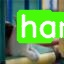

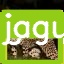

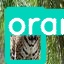

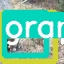

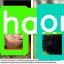

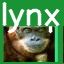

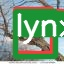

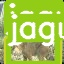

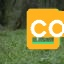

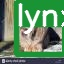

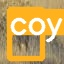

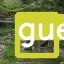

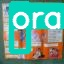

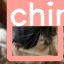

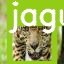

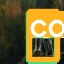

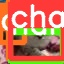

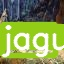

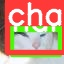

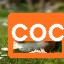

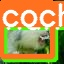

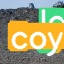

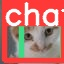

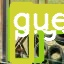

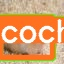

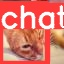

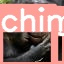

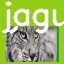

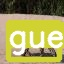

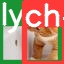

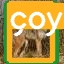

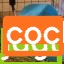

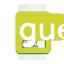

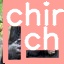

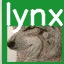

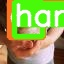

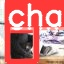

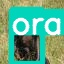

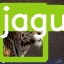

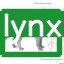

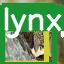

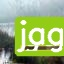

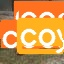

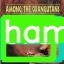

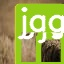

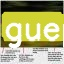

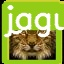

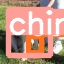

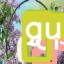

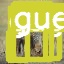

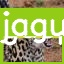

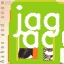

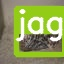

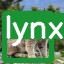

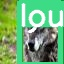

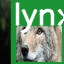

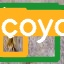

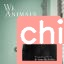

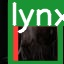

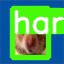

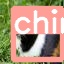

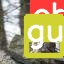

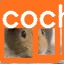

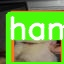

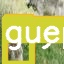

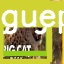

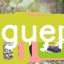

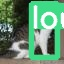

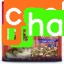

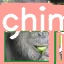

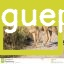

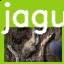

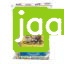

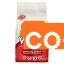

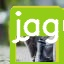

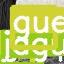

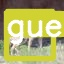

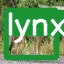

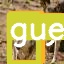

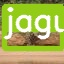

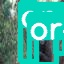

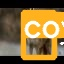

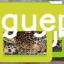

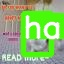

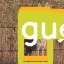

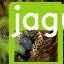

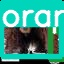

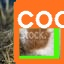

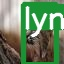

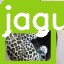

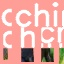

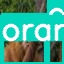

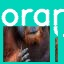

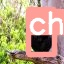

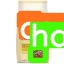

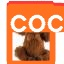

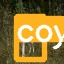

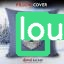

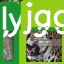

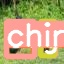

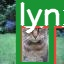

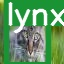

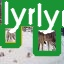

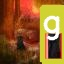

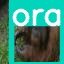

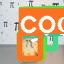

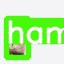

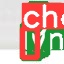

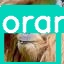

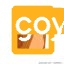

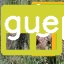

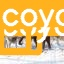

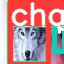

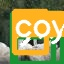

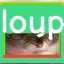

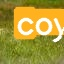

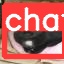

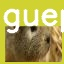

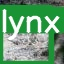

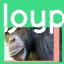

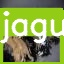

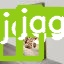

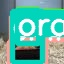

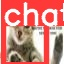

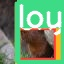

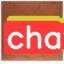

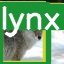

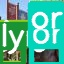

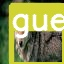

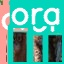

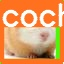

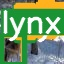

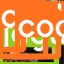

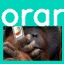

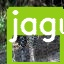

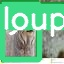

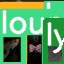

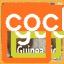

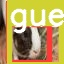

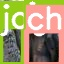

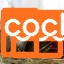

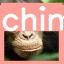

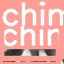

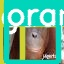

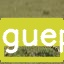

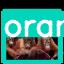

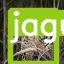

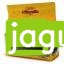

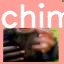

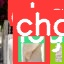

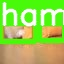

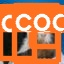

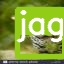

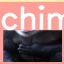

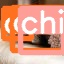

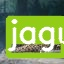

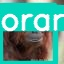

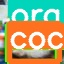

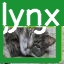

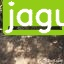

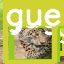

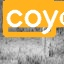

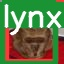

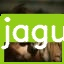

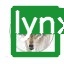

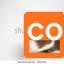

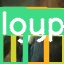

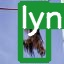

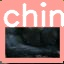

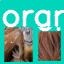

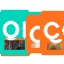

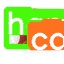

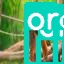

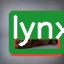

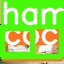

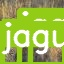

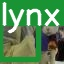

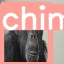

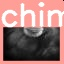

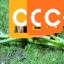

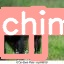

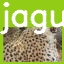

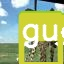

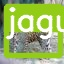

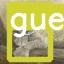

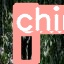

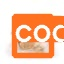

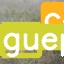

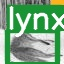

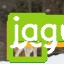

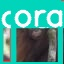

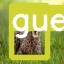

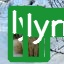

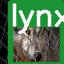

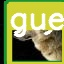

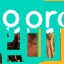

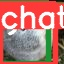

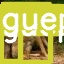

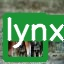

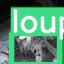

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName,width=256,height=256))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluation sur le jeu de test

In [ ]:
classes

{0: 'chat',
 1: 'chimpanze',
 2: 'cochon d-inde',
 3: 'coyote',
 4: 'guepard',
 5: 'hamster',
 6: 'jaguar',
 7: 'json',
 8: 'loup',
 9: 'lynx',
 10: 'orang-outan'}

In [ ]:
path_labels = '/content/datasets/Animals-test-dataset-1/test/labels/'
path_pred = 'runs/detect/exp4/labels/'

labels = {}
predictions = {}
size = 64

convert_labels_id_1 = {
    0:0,
    1:2,
    2:3,
    3:5,
    4:6,
    5:7,
    6:8,
    7:9
}

convert_labels_id_2 = {
    0:0,
    1:2,
    2:3,
    3:5,
    4:6,
    5:8,
    6:9,
    7:10
}

# Labels
files = os.listdir(path_labels)
for txt_file in files:
  f = open(path_labels+txt_file,'r')
  lines = f.readlines()
  id = int(txt_file.split('_')[0][3:])

  lab_list = []
  for line in lines:
    els = line.split(' ')
    cat_id = convert_labels_id_2[int(els[0])]
    xm = int(float(els[1])*size)
    ym = int(float(els[2])*size)
    w = int(float(els[3])*size)
    h = int(float(els[4].split("\n")[0])*size)

    lab_list.append([cat_id,xm,ym,w,h])
  labels[id] = lab_list

# Prédictions
files = os.listdir(path_pred)
for txt_file in files:
  f = open(path_pred+txt_file,'r')
  lines = f.readlines()
  id = int(txt_file.split('_')[0][3:])

  lab_list = []
  for line in lines:
    els = line.split(' ')
    cat_id = int(els[0])
    xm = int(float(els[1])*size)
    ym = int(float(els[2])*size)
    w = int(float(els[3])*size)
    h = int(float(els[4].split("\n")[0])*size)

    lab_list.append([cat_id,xm,ym,w,h])
  predictions[id] = lab_list

In [ ]:
nb_labels = [0]*10
for key in labels.keys():
  for el in labels[key]:
    nb_labels[el[0]] += 1

nb_labels

[16, 58, 13, 12, 12, 24, 15, 16, 0, 0]

In [ ]:
id = 0
classes = {}

with open('/content/datasets/Pseudo-labeled-augmentation-1/data.yaml','r') as f:
  lines = f.readlines()
  for line in lines:
    if line[0] == '-':
      classe = line.split("\n")[0][2:]
      classes[id] = classe
      id += 1

In [ ]:
def IoU(label, pred, im_size=64):
  """
  label et pred -> [classe_id,xmin,y_min,w,h]
  """
  true_image = np.zeros((im_size,im_size))
  pred_image = np.zeros((im_size,im_size))

  xm1, ym1, w1, h1 = label[1:]
  xm2, ym2, w2, h2 = pred[1:]

  x1 = int(xm1 - w1/2)
  y1 = int(ym1 - h1/2)
  x2 = int(xm2 - w2/2)
  y2 = int(ym2 - h2/2)

  true_image[y1:y1+h1,x1:x1+w1] = 1
  pred_image[y2:y2+h2,x2:x2+w2] = 1

  intersection = np.logical_and(true_image,pred_image)
  union = np.logical_or(true_image,pred_image)

  IOU = np.sum(intersection) / np.sum(union)

  """overlap = true_image*pred_image # Logical AND
  union = true_image + pred_image # Logical OR

  IOU = overlap.sum()/float(union.sum())"""

  return IOU

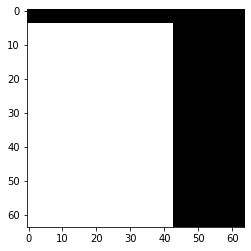

In [ ]:
a = np.zeros((64,64))
xm,ym,w,h = predictions[11][2][1:]

x = int(xm-w/2)
y = int(ym-h/2)

a[y:y+h,x:x+w] = 1

plt.imshow(a,cmap='gray')

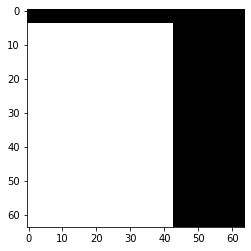

In [ ]:
b = np.zeros((64,64))
xm,ym,w,h = labels[11][0][1:]

x = int(xm-w/2)
y = int(ym-h/2)

b[y:y+h,x:x+w] = 1

plt.imshow(a,cmap='gray')

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    id = int(imageName.split('_')[0][35:])
    if id == 1:
      display(Image(filename=imageName,width=256,height=256))
      print("\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

with open('test_true_labels.json','w') as jsonFile:
  json.dump(labels,jsonFile)

In [ ]:
with open('test_predicted_labels.json','w') as jsonFile:
  json.dump(predictions,jsonFile)

In [ ]:
import numpy as np

confusion_matrix = np.zeros((11,11))
IoU_max = -1
IOUs = []

for key in predictions.keys():
  true_labels = labels[key]
  predicted_labels = predictions[key]

  for i in range(len(true_labels)):
    IoU_max = -1
    l = true_labels[i][0]
    for j in range(len(predicted_labels)):
      IOU = IoU(true_labels[i], predicted_labels[j])
      if IOU > IoU_max:
        IoU_max = IOU
        p = predicted_labels[j][0]
    
    IOUs.append(IoU_max)
    confusion_matrix[p,l] += 1

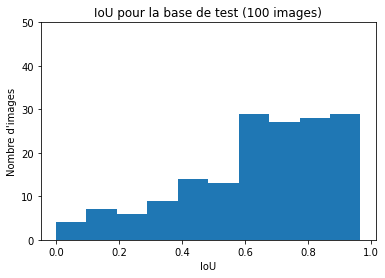

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(IOUs,10)
plt.ylim([0,50])
plt.title("IoU pour la base de test (100 images)")
plt.xlabel("IoU")
plt.ylabel("Nombre d'images")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


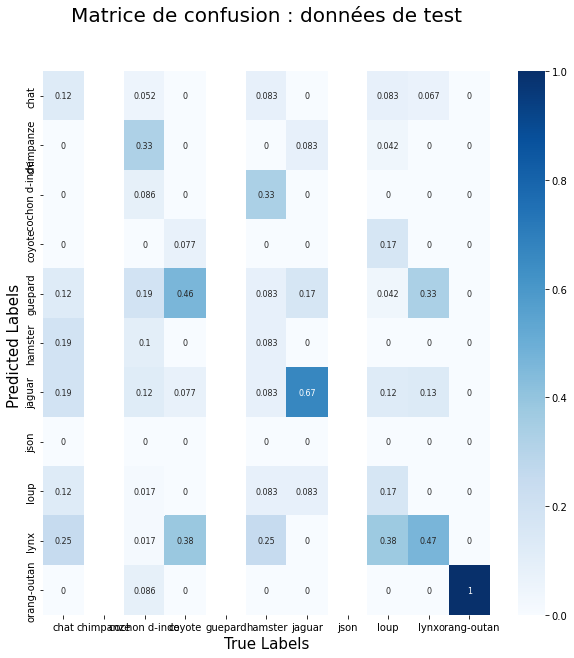

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax = plt.gca()

sns.heatmap(np.divide(confusion_matrix,np.sum(confusion_matrix,axis=0)), annot=True, 
            cmap='Blues',ax=ax,annot_kws={"fontsize":8})

ax.set_title('Matrice de confusion : données de test\n\n',size=20)
ax.set_xlabel('True Labels',size=15)
ax.set_ylabel('Predicted Labels ',size=15)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes.values(),size=10)
ax.yaxis.set_ticklabels(classes.values(),size=10)

## Display the visualization of the Confusion Matrix.
plt.show()

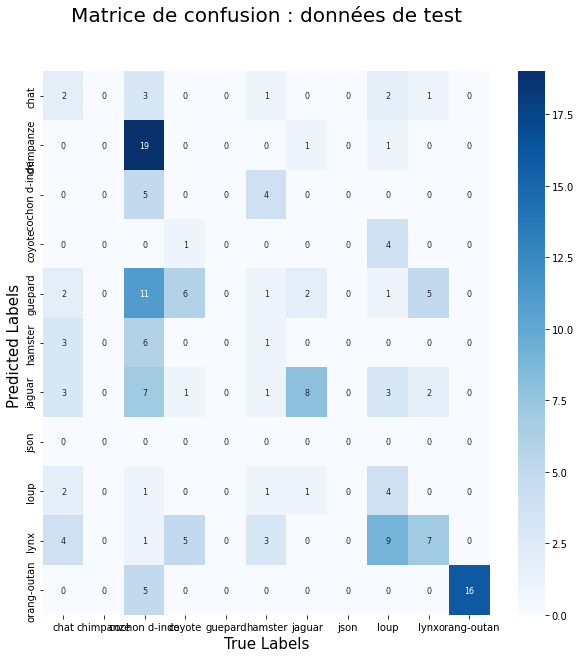

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax = plt.gca()

sns.heatmap(confusion_matrix, annot=True, 
            cmap='Blues',ax=ax,annot_kws={"fontsize":8})

ax.set_title('Matrice de confusion : données de test\n\n',size=20)
ax.set_xlabel('True Labels',size=15)
ax.set_ylabel('Predicted Labels ',size=15)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes.values(),size=10)
ax.yaxis.set_ticklabels(classes.values(),size=10)

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
precision = []
for i in range(confusion_matrix.shape[0]):
  p = confusion_matrix[i,i]/np.sum(confusion_matrix[i,:])
  precision.append(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
recall = []
for j in range(confusion_matrix.shape[1]):
  r = confusion_matrix[j,j]/np.sum(confusion_matrix[:,j])
  recall.append(r)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


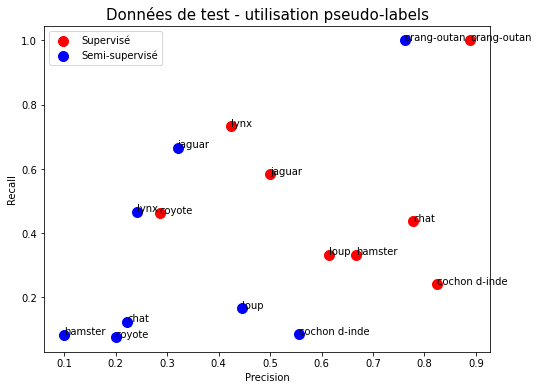

In [ ]:
annotations = list(classes.values())

plt.figure(figsize=(8,6))
plt.scatter(old_precision,old_recall,s=100,color="red")
plt.scatter(precision,recall,s=100,color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Données de test - utilisation pseudo-labels",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (precision[i], recall[i]))
for i, label in enumerate(annotations2):
    plt.annotate(label, (old_precision[i], old_recall[i]))
plt.legend(['Supervisé','Semi-supervisé'])
plt.show()

In [ ]:
recall

[0.4375,
 nan,
 0.2413793103448276,
 0.46153846153846156,
 nan,
 0.3333333333333333,
 0.5833333333333334,
 0.3333333333333333,
 0.7333333333333333,
 1.0,
 nan]

In [ ]:
precision_pseudo

[0.4,
 0.0,
 0.7777777777777778,
 0.2857142857142857,
 0.0,
 1.0,
 0.21621621621621623,
 nan,
 0.5769230769230769,
 0.2857142857142857,
 0.875]

In [ ]:
print(annotations)
print(precision)

['chat', 'chimpanze', 'cochon d-inde', 'coyote', 'guepard', 'hamster', 'jaguar', 'json', 'loup', 'lynx', 'orang-outan']
[0.7777777777777778, 0.0, 0.8235294117647058, 0.2857142857142857, 0.0, 0.6666666666666666, 0.5, 0.6153846153846154, 0.4230769230769231, 0.8888888888888888, nan]


In [ ]:
annotations2 = ['chat','chimpanze','cochon d-inde','coyote','guepard','hamster','jaguar','loup','lynx','orang-outan','json']
print(annotations2)

['chat', 'chimpanze', 'cochon d-inde', 'coyote', 'guepard', 'hamster', 'jaguar', 'loup', 'lynx', 'orang-outan', 'json']


In [ ]:
print(annotations)

['chat', 'chimpanze', 'cochon d-inde', 'coyote', 'guepard', 'hamster', 'jaguar', 'json', 'loup', 'lynx', 'orang-outan']


In [ ]:
#old_precision = precision
#old_recall = recall